Is there a correlation between electricity and natural gas consumption in the Residential sector when their prices are high?

-get consumption data for Electricity and Natural gas for Residential

https://www.eia.gov/opendata/commands.php

In [63]:
# Dependencies
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
from config import api_key

url = 'http://api.eia.gov/series/?api_key='


In [16]:
#Residential Sector Energy Consumption
#https://www.eia.gov/opendata/qb.php?category=711250&sdid=TOTAL.TERCBUS.A
resident_energy = '&series_id=TOTAL.TERCBUS.A'

In [ ]:
#U.S. Natural Gas Residential Consumption, Annual
#https://www.eia.gov/opendata/qb.php?category=479755&sdid=NG.N3010US2.A
resident_naturalgas = '&series_id=NG.N3010US2.A'

In [17]:
response = requests.get(url + api_key + resident_energy).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "request": {
        "command": "series",
        "series_id": "TOTAL.TERCBUS.A"
    },
    "series": [
        {
            "data": [
                [
                    "2018",
                    21620.137
                ],
                [
                    "2017",
                    19889.581
                ],
                [
                    "2016",
                    20181.113
                ],
                [
                    "2015",
                    20616.83
                ],
                [
                    "2014",
                    21444.938
                ],
                [
                    "2013",
                    21051.185
                ],
                [
                    "2012",
                    19869.589
                ],
                [
                    "2011",
                    21381.247
                ],
                [
                    "2010",
                    21894.159
                ],
    

In [18]:
response_data = response['series']
data_list = []

for item in response_data:
    data_list.append(item['data'])

In [52]:
data_list[0][2][0]

'2016'

In [53]:
year=[]
energy_consumed=[]

for i in range(len(data_list[0])):
    year.append(data_list[0][i][0])
    energy_consumed.append(data_list[0][i][1])
        


In [55]:
year, energy_consumed

(['2018',
  '2017',
  '2016',
  '2015',
  '2014',
  '2013',
  '2012',
  '2011',
  '2010',
  '2009',
  '2008',
  '2007',
  '2006',
  '2005',
  '2004',
  '2003',
  '2002',
  '2001',
  '2000',
  '1999',
  '1998',
  '1997',
  '1996',
  '1995',
  '1994',
  '1993',
  '1992',
  '1991',
  '1990',
  '1989',
  '1988',
  '1987',
  '1986',
  '1985',
  '1984',
  '1983',
  '1982',
  '1981',
  '1980',
  '1979',
  '1978',
  '1977',
  '1976',
  '1975',
  '1974',
  '1973',
  '1972',
  '1971',
  '1970',
  '1969',
  '1968',
  '1967',
  '1966',
  '1965',
  '1964',
  '1963',
  '1962',
  '1961',
  '1960',
  '1959',
  '1958',
  '1957',
  '1956',
  '1955',
  '1954',
  '1953',
  '1952',
  '1951',
  '1950',
  '1949'],
 [21620.137,
  19889.581,
  20181.113,
  20616.83,
  21444.938,
  21051.185,
  19869.589,
  21381.247,
  21894.159,
  21081.368,
  21667.627,
  21518.992,
  20670.321,
  21612.646,
  21081.388,
  21119.32,
  20785.794,
  20037.592,
  20421.041,
  19553.511,
  18951.919,
  18962.255,
  19501.836,
  

In [56]:
data_list[0]

[['2018', 21620.137],
 ['2017', 19889.581],
 ['2016', 20181.113],
 ['2015', 20616.83],
 ['2014', 21444.938],
 ['2013', 21051.185],
 ['2012', 19869.589],
 ['2011', 21381.247],
 ['2010', 21894.159],
 ['2009', 21081.368],
 ['2008', 21667.627],
 ['2007', 21518.992],
 ['2006', 20670.321],
 ['2005', 21612.646],
 ['2004', 21081.388],
 ['2003', 21119.32],
 ['2002', 20785.794],
 ['2001', 20037.592],
 ['2000', 20421.041],
 ['1999', 19553.511],
 ['1998', 18951.919],
 ['1997', 18962.255],
 ['1996', 19501.836],
 ['1995', 18516.656],
 ['1994', 18110.261],
 ['1993', 18211.592],
 ['1992', 17354.77],
 ['1991', 17419.327],
 ['1990', 16940.06],
 ['1989', 17789.714],
 ['1988', 17132.613],
 ['1987', 16263.214],
 ['1986', 15975.109],
 ['1985', 16041.334],
 ['1984', 15959.563],
 ['1983', 15425.021],
 ['1982', 15530.937],
 ['1981', 15261.544],
 ['1980', 15753.38],
 ['1979', 15812.724],
 ['1978', 16132.287],
 ['1977', 15661.713],
 ['1976', 15410.259],
 ['1975', 14813.4],
 ['1974', 14654.336],
 ['1973', 14897.3

In [78]:
df_data = pd.DataFrame({'Year':year, 'Energy Consumed':energy_consumed})
sorted_data = df_data.sort_values('Year', ascending='True')
sorted_data.head()

,Year,Energy Consumed
69,1949,5599.250
68,1950,5988.553
67,1951,6380.193
66,1952,6560.243
65,1953,6558.748


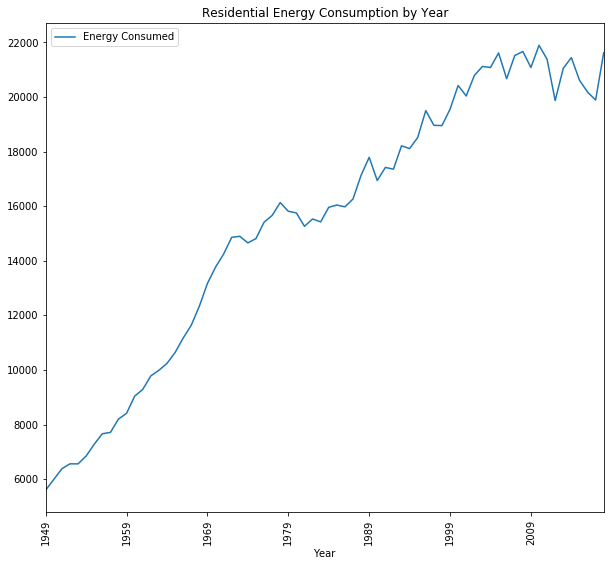

In [82]:
graph = sorted_data.plot(kind='line', figsize=(10,9), x='Year',
                         sort_columns=True, title='Residential Energy Consumption by Year')
plt.xticks(rotation=90)
plt.show()